In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [216]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,auc,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import chi2,f_classif,SelectKBest

In [217]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline(connected=True)

In [218]:
pd.pandas.set_option('display.max_columns',None)

In [219]:
data = pd.read_csv('zomato.csv',encoding='latin-1')

In [220]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [221]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [222]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [223]:
data.shape

(9551, 21)

In [224]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [226]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [227]:
data.duplicated().sum()

0

In [228]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [229]:
data['Restaurant Name'].value_counts().head(10)

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: Restaurant Name, dtype: int64

### EDA

In [230]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [231]:
data['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

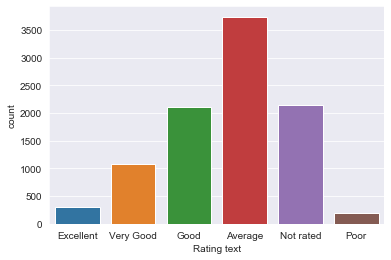

In [232]:
sns.countplot(data['Rating text'])
plt.show()

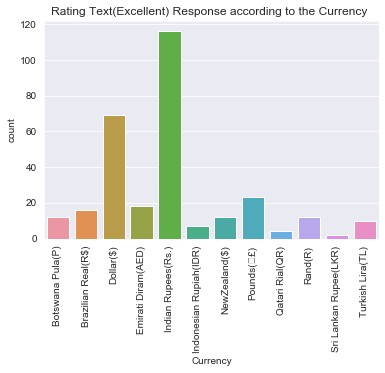

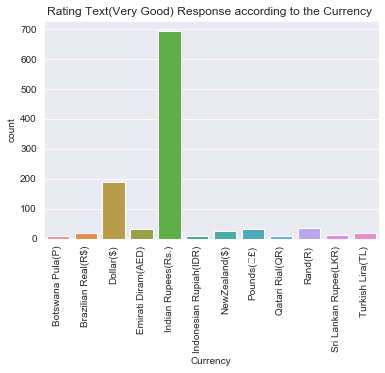

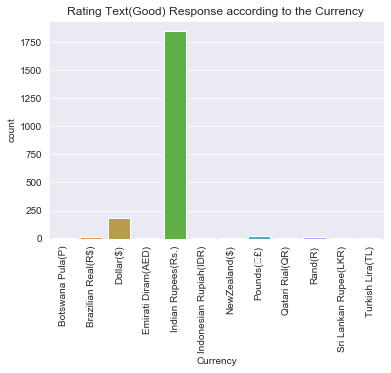

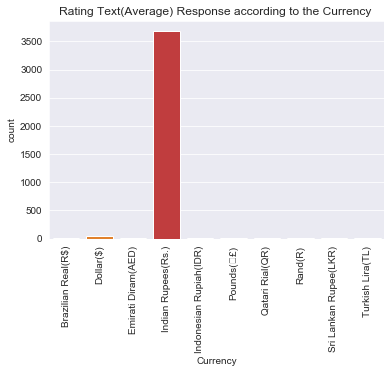

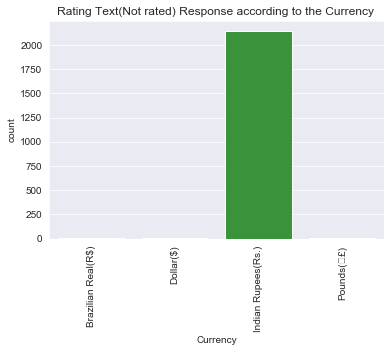

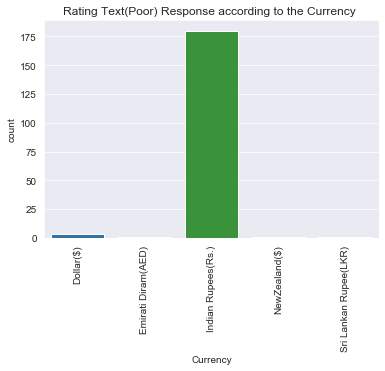

In [233]:
sns.countplot(data[data['Rating text']=='Excellent']['Currency'])
plt.title('Rating Text(Excellent) Response according to the Currency ')
plt.xticks(rotation=90)
plt.show()
sns.countplot(data[data['Rating text']=='Very Good']['Currency'])
plt.title('Rating Text(Very Good) Response according to the Currency ')
plt.xticks(rotation=90)
plt.show()
sns.countplot(data[data['Rating text']=='Good']['Currency'])
plt.xticks(rotation=90)
plt.title('Rating Text(Good) Response according to the Currency ')
plt.show()
sns.countplot(data[data['Rating text']=='Average']['Currency'])
plt.title('Rating Text(Average) Response according to the Currency ')
plt.xticks(rotation=90)
plt.show()
sns.countplot(data[data['Rating text']=='Not rated']['Currency'])
plt.title('Rating Text(Not rated) Response according to the Currency ')
plt.xticks(rotation=90)
plt.show()
sns.countplot(data[data['Rating text']=='Poor']['Currency'])
plt.title('Rating Text(Poor) Response according to the Currency ')
plt.xticks(rotation=90)
plt.show()


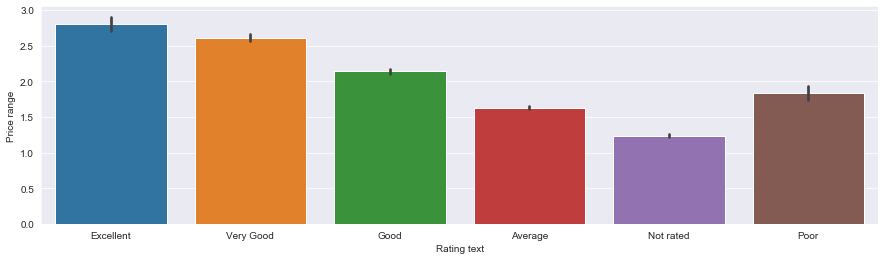

In [234]:
plt.figure(figsize=(15,4))
sns.barplot(data['Rating text'],data['Price range'])
plt.show()

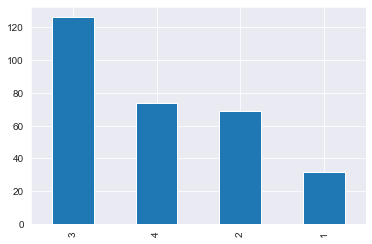

In [235]:
data[data['Rating text']=='Excellent']['Price range'].value_counts().plot(kind='bar')
plt.show()

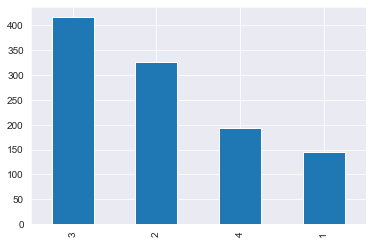

In [236]:
data[data['Rating text']=='Very Good']['Price range'].value_counts().plot(kind='bar')
plt.show()

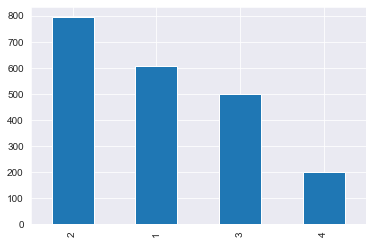

In [237]:
data[data['Rating text']=='Good']['Price range'].value_counts().plot(kind='bar')
plt.show()

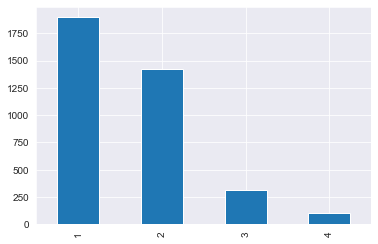

In [238]:
data[data['Rating text']=='Average']['Price range'].value_counts().plot(kind='bar')
plt.show()

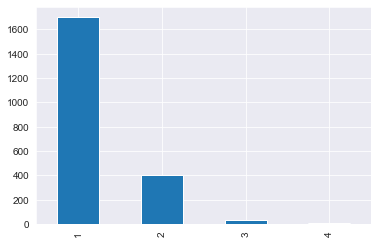

In [239]:
data[data['Rating text']=='Not rated']['Price range'].value_counts().plot(kind='bar')
plt.show()

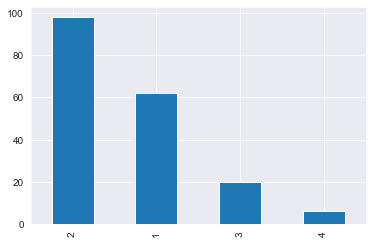

In [240]:
data[data['Rating text']=='Poor']['Price range'].value_counts().plot(kind='bar')
plt.show()

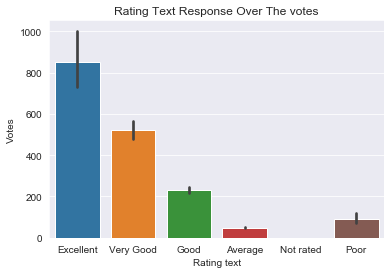

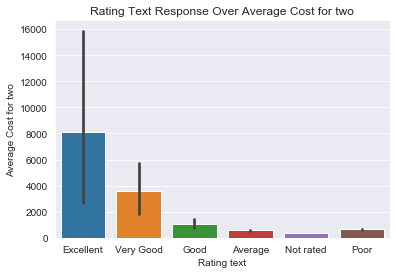

In [241]:
sns.barplot(data['Rating text'],data['Votes'])
plt.title('Rating Text Response Over The votes')
plt.show()
sns.barplot(data['Rating text'],data['Average Cost for two'])
plt.title('Rating Text Response Over Average Cost for two')
plt.show()

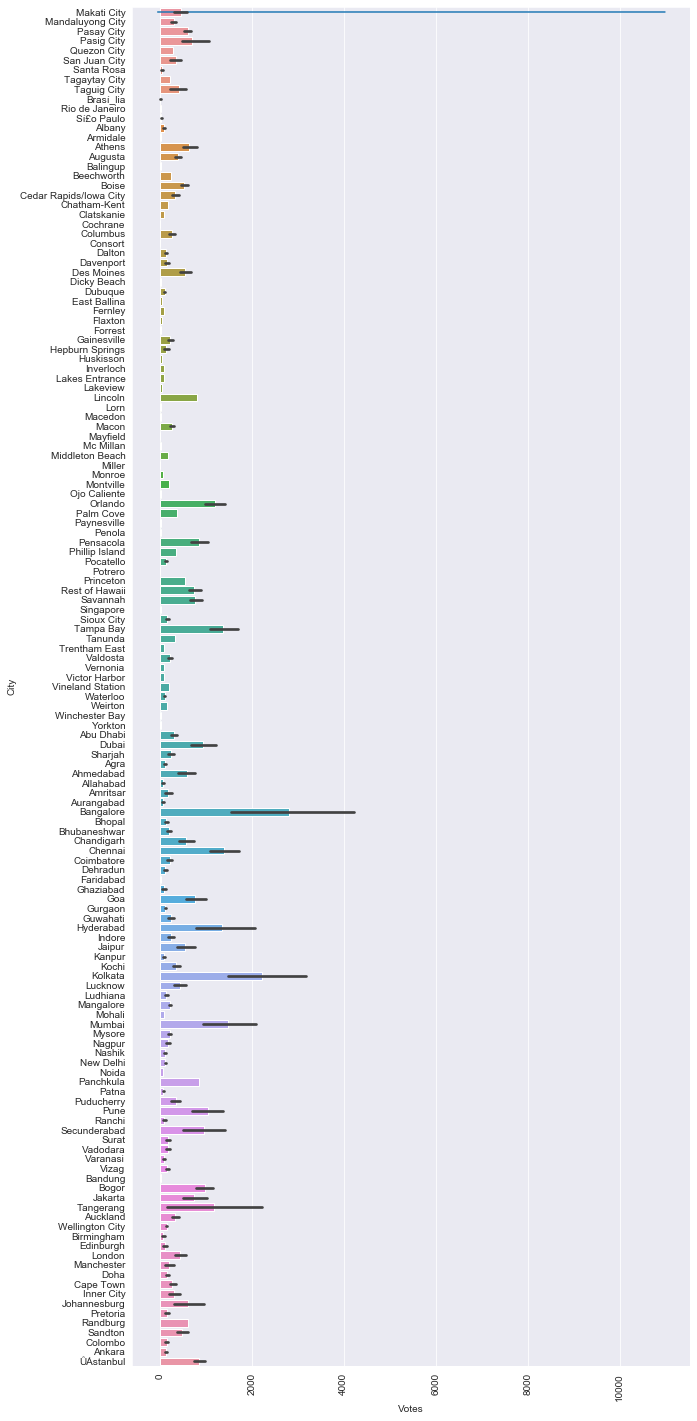

In [242]:
plt.figure(figsize=(10,25))
ax = sns.distplot(data['Votes'],kde=True)
sns.barplot(data['Votes'],data['City'],ax=ax)
plt.xticks(rotation=90)
plt.show()

In [243]:
len(data['Restaurant Name'].value_counts())

7446

In [244]:
data1 = data[['Average Cost for two','Currency','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Price range','Aggregate rating','Rating color','Rating text','Votes']].copy()

In [245]:
data1.head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


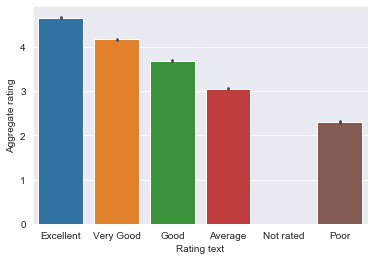

In [246]:
sns.barplot(data['Rating text'],data['Aggregate rating'])
plt.show()

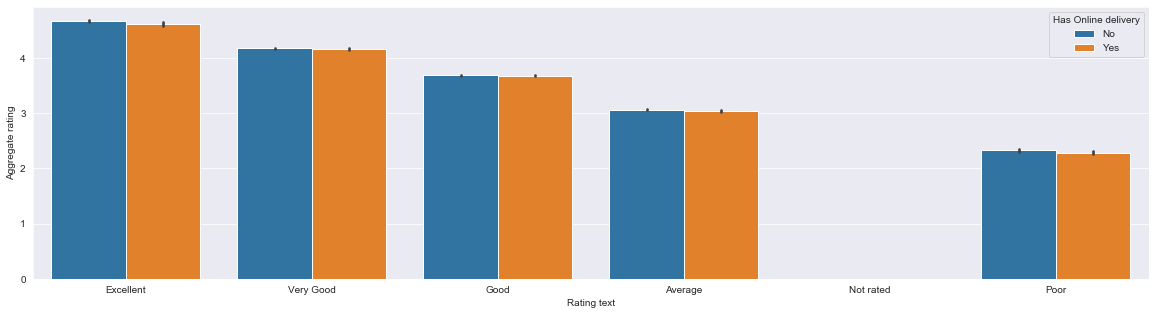

In [247]:
plt.figure(figsize=(20,5))
sns.barplot(data['Rating text'],data['Aggregate rating'],hue=data['Has Online delivery'])
plt.show()

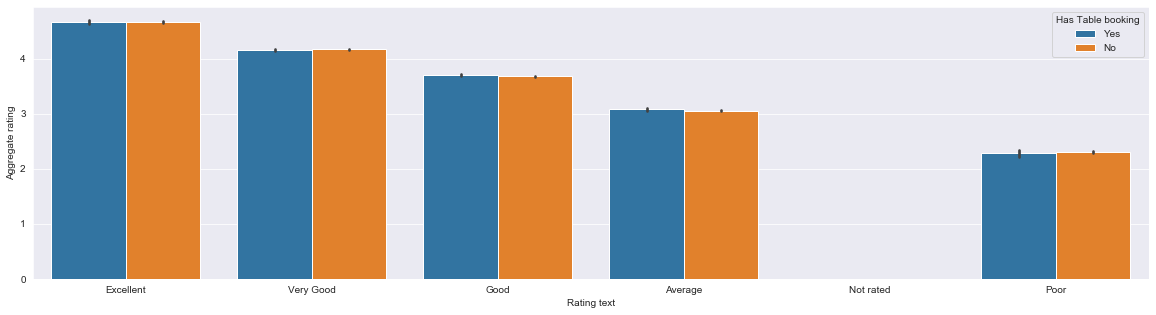

In [248]:
plt.figure(figsize=(20,5))
sns.barplot(data['Rating text'],data['Aggregate rating'],hue=data['Has Table booking'])
plt.show()

<Figure size 288x576 with 0 Axes>

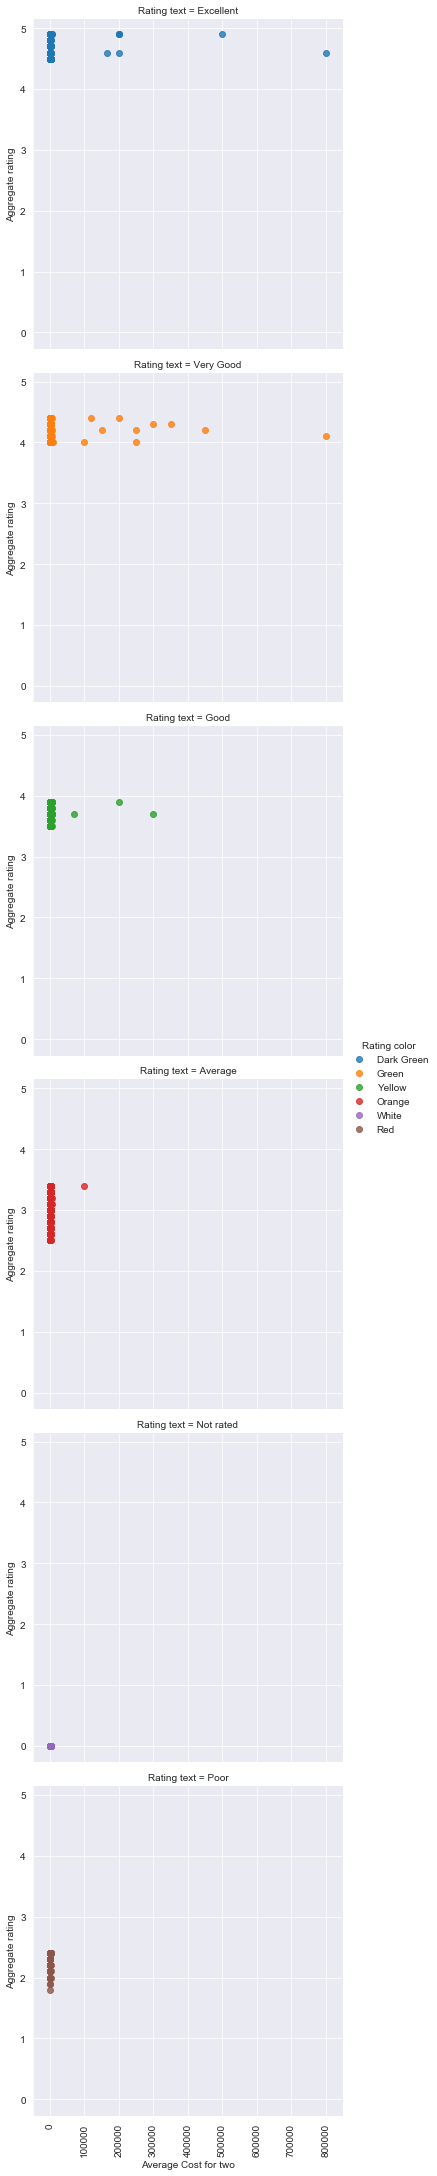

In [249]:
plt.figure(figsize=(4,8))
sns.lmplot(x='Average Cost for two',y='Aggregate rating',data=data1, fit_reg=False,hue='Rating color',row='Rating text')
plt.xticks(rotation=90)
plt.show()

<Figure size 288x576 with 0 Axes>

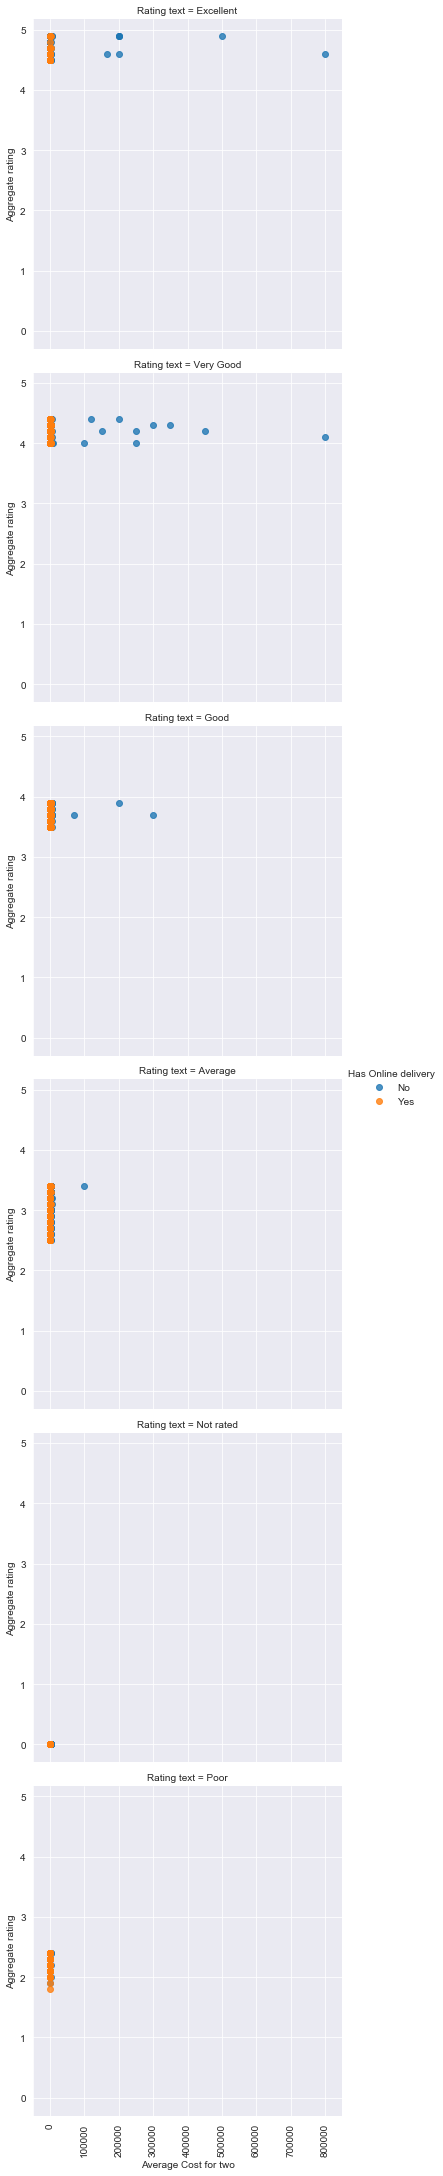

In [250]:
plt.figure(figsize=(4,8))
sns.lmplot(x='Average Cost for two',y='Aggregate rating',data=data1, fit_reg=False,hue='Has Online delivery',row='Rating text')
plt.xticks(rotation=90)
plt.show()

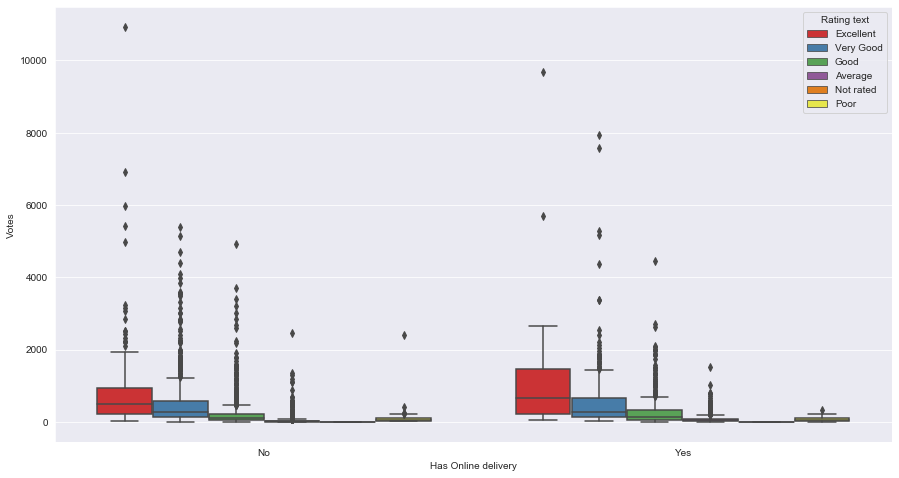

In [251]:
plt.figure(figsize=(15,8))
sns.boxplot(data1['Has Online delivery'],data1['Votes'],hue=data1['Rating text'],palette='Set1')
plt.show()

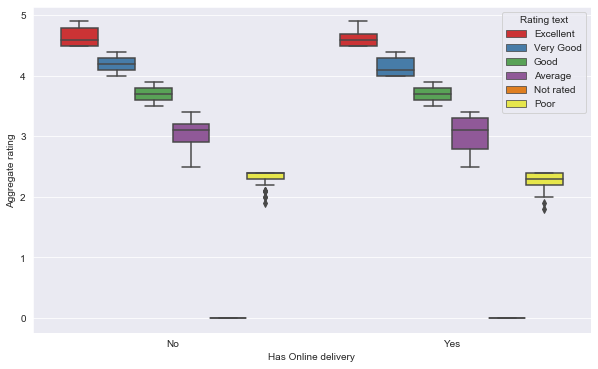

In [252]:
plt.figure(figsize=(10,6))
sns.boxplot(data1['Has Online delivery'],data1['Aggregate rating'],hue=data1['Rating text'],palette='Set1')
plt.show()

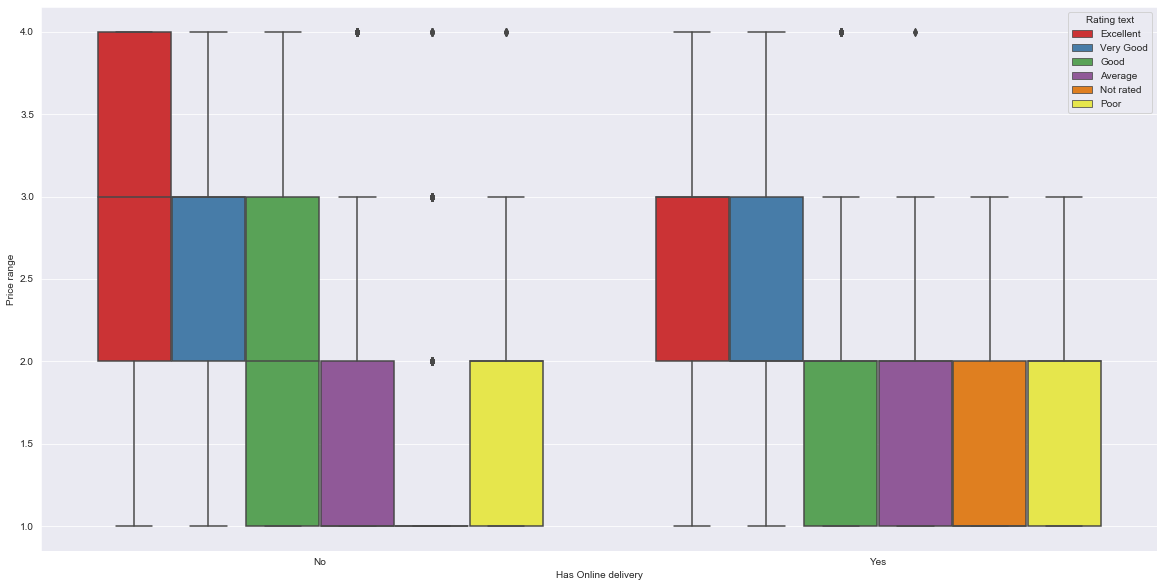

In [253]:
plt.figure(figsize=(20,10))
sns.boxplot(data1['Has Online delivery'],data1['Price range'],hue=data1['Rating text'],palette='Set1')
plt.show()

### Plot for Lattitude and Longitude. 

In [254]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [255]:
longitude,lattitude = data['Longitude'],data['Latitude']

In [256]:
sns.set_style('darkgrid')

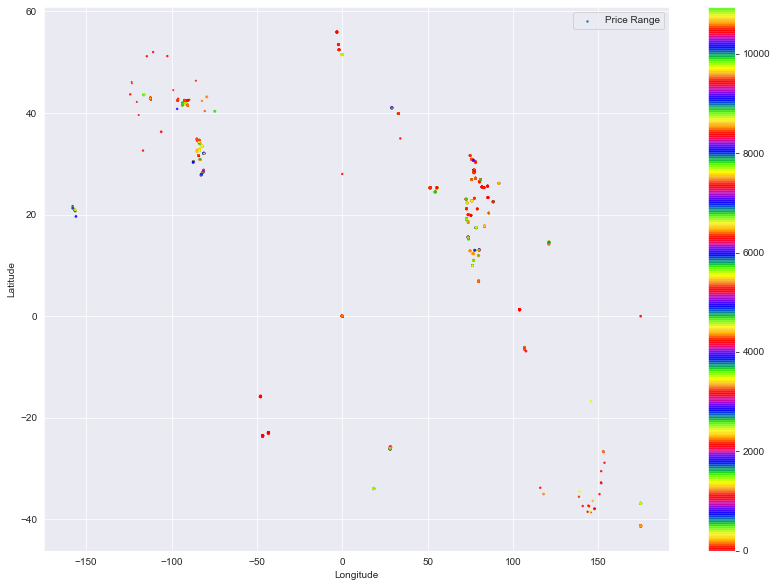

In [257]:
fig,ax=plt.subplots(figsize=(14,10))
data.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.8,ax=ax,s=data['Price range'],label='Price Range',c=data['Votes'],cmap=plt.get_cmap('prism'),colorbar=True)
plt.show()

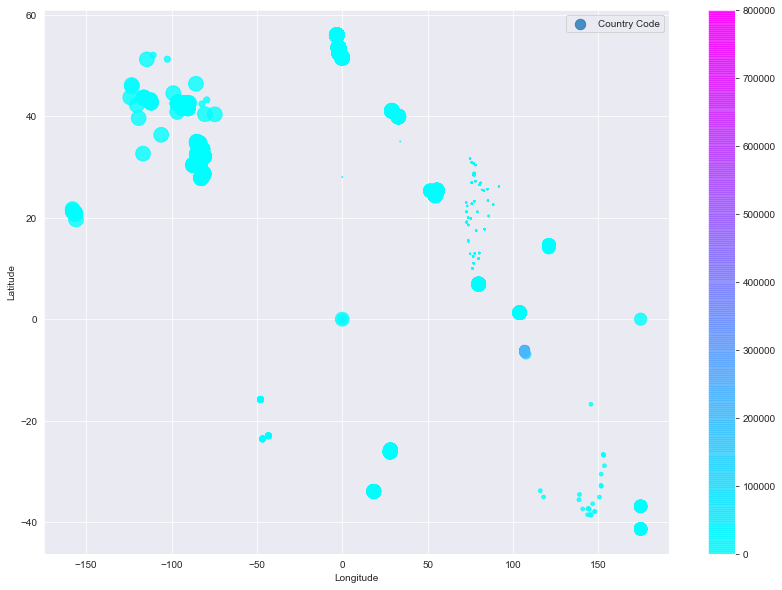

In [258]:
fig,ax=plt.subplots(figsize=(14,10))
data.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.8,ax=ax,s=data['Country Code'],label='Country Code',c=data['Average Cost for two'],cmap=plt.get_cmap('cool'),colorbar=True)
plt.show()

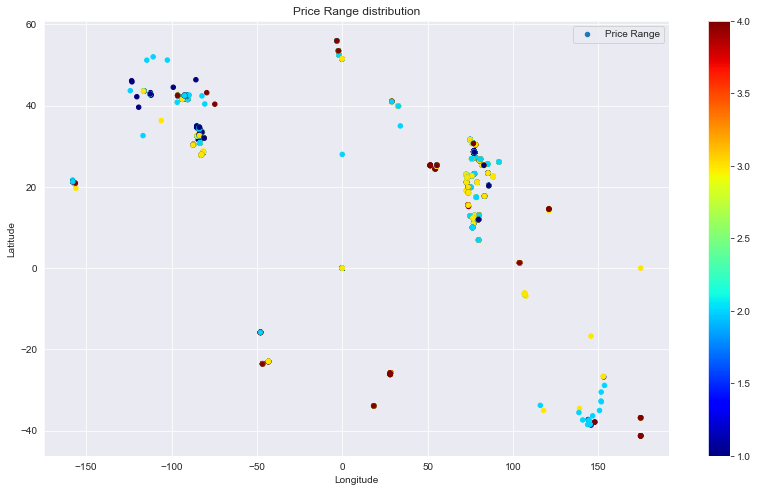

In [259]:
fig,ax = plt.subplots(figsize=(14,8))
data.plot(x='Longitude',y='Latitude',c=data['Price range'],ax=ax,kind='scatter',cmap=plt.get_cmap('jet'),title='Price Range distribution',label='Price Range')
plt.show()

In [260]:
data['Cuisines'].value_counts().sort_values(ascending=False).head(30)

North Indian                                936
North Indian, Chinese                       511
Fast Food                                   354
Chinese                                     354
North Indian, Mughlai                       334
Cafe                                        299
Bakery                                      218
North Indian, Mughlai, Chinese              197
Bakery, Desserts                            170
Street Food                                 149
Pizza, Fast Food                            131
Chinese, Fast Food                          118
Mithai, Street Food                         116
South Indian                                112
Bakery, Fast Food                           108
Chinese, North Indian                       105
Mughlai                                     103
Ice Cream, Desserts                          83
Ice Cream                                    74
North Indian, Fast Food                      74
Mithai                                  

In [212]:
data['Cuisines'] = data['Cuisines'].apply(lambda x:str(x).replace('_',' '))

## DataPreprocessing.

In [261]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [303]:
data2 = data[['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines']].copy()

In [304]:
data2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean"


In [306]:
len(data2.City.value_counts())

141

In [307]:
data.drop(columns=data2.columns,inplace=True)

In [308]:
data.head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [315]:
data['Currency'].value_counts().head(13)

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Rand(R)                     60
Emirati Diram(AED)          60
Brazilian Real(R$)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Sri Lankan Rupee(LKR)       20
Qatari Rial(QR)             20
Name: Currency, dtype: int64

In [313]:
len(data['Currency'].value_counts())

12

In [316]:
di = {'Indonesian Rupiah(IDR)':0,'Sri Lankan Rupee(LKR)':1,'Rand(R)':2,'Indian Rupees(Rs.)':3,'Pounds(£)':4,'Dollar($)':5,'NewZealand($)':6,'Turkish Lira(TL)':7,'Botswana Pula(P)':8,'Brazilian Real(R$)':9,'Dollar($)':10,'Emirati Diram(AED)':11,'Qatari Rial(QR)':12}

In [317]:
data['Currency']=data['Currency'].map(di)

In [318]:
data.head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,8,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,8,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,8,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,8,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,8,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [319]:
data['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [320]:
hi = {'No':0,'Yes':1}
data['Has Table booking'] = data['Has Table booking'].map(hi)

In [321]:
data['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [322]:
f={'No':0,'Yes':1}
data['Has Online delivery']=data['Has Online delivery'].map(f)

In [323]:
data['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [324]:
c={'No':0,'Yes':1}
data['Is delivering now']=data['Is delivering now'].map(c)

In [325]:
data['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

In [326]:
v = {'No':0}
data['Switch to order menu']=data['Switch to order menu'].map(v)

In [327]:
data.head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,8,1,0,0,0,3,4.8,Dark Green,Excellent,314
1,1200,8,1,0,0,0,3,4.5,Dark Green,Excellent,591
2,4000,8,1,0,0,0,4,4.4,Green,Very Good,270
3,1500,8,0,0,0,0,4,4.9,Dark Green,Excellent,365
4,1500,8,1,0,0,0,4,4.8,Dark Green,Excellent,229


In [328]:
data['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [329]:
rating = {'Not rated':0,'Poor':1,'Good':2,'Average':3,'Very Good':4,'Excellent':5}
data['Rating text']=data['Rating text'].map(rating)

In [330]:
data['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [336]:
print(data[data['Rating color']=='Orange']['Rating text'].value_counts())
print(data[data['Rating color']=='White']['Rating text'].value_counts())
print(data[data['Rating color']=='Yellow']['Rating text'].value_counts())
print(data[data['Rating color']=='Green']['Rating text'].value_counts())
print(data[data['Rating color']=='Dark Green']['Rating text'].value_counts())
print(data[data['Rating color']=='Red']['Rating text'].value_counts())

3    3737
Name: Rating text, dtype: int64
0    2148
Name: Rating text, dtype: int64
2    2100
Name: Rating text, dtype: int64
4    1079
Name: Rating text, dtype: int64
5    301
Name: Rating text, dtype: int64
1    186
Name: Rating text, dtype: int64


In [337]:
m = {'Orange':3,'White':0,'Yellow':2,'Green':4,'Dark Green':5,'Red':1}
data['Rating color']=data['Rating color'].map(m)

In [338]:
data.head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,8,1,0,0,0,3,4.8,5,5,314
1,1200,8,1,0,0,0,3,4.5,5,5,591
2,4000,8,1,0,0,0,4,4.4,4,4,270
3,1500,8,0,0,0,0,4,4.9,5,5,365
4,1500,8,1,0,0,0,4,4.8,5,5,229


In [339]:
x = data.drop(columns=['Rating text'])
y = data['Rating text']

In [340]:
x.shape,y.shape

((9551, 10), (9551,))

In [342]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,stratify=y,random_state=42)

In [343]:
x_train.shape,x_test.shape

((7640, 10), (1911, 10))

In [344]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

### Constant Feature removal.

In [345]:
from sklearn.feature_selection import VarianceThreshold

In [346]:
var = VarianceThreshold(threshold=0.01)
x_train_unique = var.fit_transform(x_train_scalled)
x_test_unique  = var.transform(x_test_scalled)

In [347]:
x_train_unique.shape,x_train_unique.shape

((7640, 9), (7640, 9))

### Duplicated_remove.

In [353]:
x_train_T = x_train_unique.T  
x_test_T  = x_test_unique.T

In [354]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T  = pd.DataFrame(x_test_T)

In [355]:
duplicated = x_train_T.duplicated().sum()
duplicated

0

In [356]:
duplicated_features = x_train_T.duplicated()

In [357]:
keep_them  = [not i for i in duplicated_features]

In [358]:
X_train = x_train_T[keep_them].T
X_test  = x_test_T[keep_them].T

In [360]:
X_train.shape,X_test.shape

((7640, 9), (1911, 9))

### Feature Selection
- Most of the columns are in the categorical and non-negetive format so that why we are going to use the chi2 test.

In [362]:
chi2_score,p_values = chi2(x_train,y_train)

In [363]:
P_values = pd.Series(p_values,index=x_train.columns)

In [364]:
P_values.sort_values(ascending=False,inplace=True)

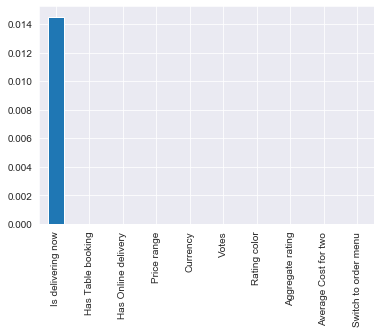

In [366]:
P_values.plot(kind='bar')
plt.show()

In [371]:
sel = SelectKBest(chi2,k=8)

In [377]:
sel.fit(x_train,y_train)

SelectKBest(k=8, score_func=<function chi2 at 0x0CFD5C90>)

In [378]:
feaatures = x_train.columns[sel.get_support()]
feaatures

Index(['Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Votes'],
      dtype='object')

In [379]:
X_train = sel.transform(x_train)
X_test  = sel.transform(x_test)

In [380]:
X_train.shape,X_test.shape

((7640, 8), (1911, 8))

In [382]:
X_train = pd.DataFrame(X_train,columns=feaatures)
X_test  = pd.DataFrame(X_test,columns=feaatures)

In [383]:
corrmat = X_train.corr()
corrmat

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Votes
Average Cost for two,1.000000,-0.087999,0.004469,-0.021586,0.077637,0.054748,0.063836,0.075283
Currency,-0.087999,1.000000,-0.057057,-0.126187,0.190890,0.242381,0.229980,0.137420
Has Table booking,0.004469,-0.057057,1.000000,0.090465,0.498630,0.191444,0.147677,0.163744
Has Online delivery,-0.021586,-0.126187,0.090465,1.000000,0.069722,0.225430,0.152750,0.066104
Price range,0.077637,0.190890,0.498630,0.069722,1.000000,0.438495,0.367865,0.319478
Aggregate rating,0.054748,0.242381,0.191444,0.225430,0.438495,1.000000,0.882152,0.319711
Rating color,0.063836,0.229980,0.147677,0.152750,0.367865,0.882152,1.000000,0.300758
Votes,0.075283,0.137420,0.163744,0.066104,0.319478,0.319711,0.300758,1.000000


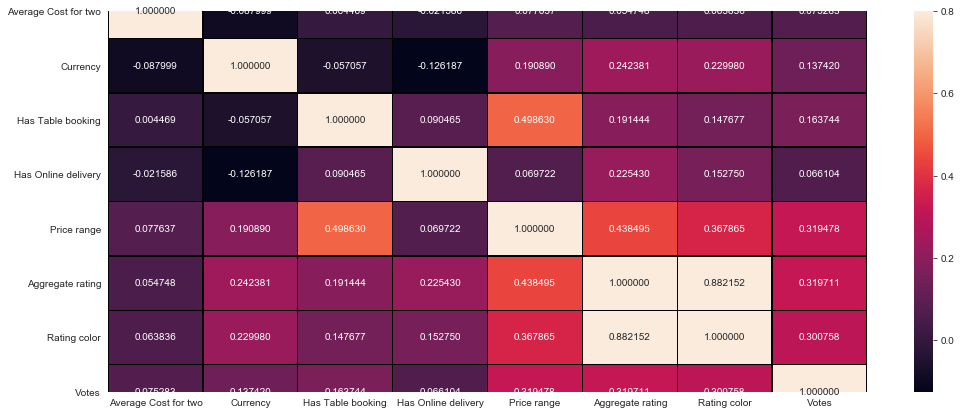

In [385]:
plt.figure(figsize=(17,7))
sns.heatmap(corrmat,annot=True,vmax=0.8,fmt='f',linewidths=0.4,linecolor='black')
plt.show()

**HERE,we see the most of feature are highly correlated to each they are incrasing the complexity of our model.**

In [403]:
y_train.value_counts()

3    2989
0    1718
2    1680
4     863
5     241
1     149
Name: Rating text, dtype: int64

In [404]:
from imblearn.over_sampling import SMOTE

In [406]:
sm = SMOTE(sampling_strategy='all',random_state=42,k_neighbors=5)

In [408]:
x_train_res,y_train_res = sm.fit_sample(X_train,y_train)

In [409]:
y_train_res.value_counts()

5    2989
4    2989
3    2989
2    2989
1    2989
0    2989
Name: Rating text, dtype: int64

### Lets Apply the Algorothm.

In [410]:
knn = KNeighborsClassifier()

In [411]:
from scipy.stats import randint

In [412]:
params = {'n_neighbors':randint(1,50),'algorithm':['ball_tree', 'kd_tree', 'brute'],}

In [413]:
knn_cv = RandomizedSearchCV(knn,params,cv=10,random_state=42)

In [414]:
knn_cv.fit(x_train_res,y_train_res)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x193D0850>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [416]:
knn_cv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 2}

In [420]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [421]:
knn_cv.best_score_

0.824414653542421

In [422]:
print('Accuarcy with test data :-',knn_cv.score(X_test,y_test))
print('Accuarcy with train data :-',knn_cv.score(x_train_res,y_train_res))

Accuarcy with test data :- 0.7237048665620094
Accuarcy with train data :- 0.9338128694100591


#### By using another techiniques.

In [ ]:
from sklearn.model_selection import cross_val_score

In [428]:
val_score =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_res,y_train_res)
    y_pred = knn.predict(X_test)
    vaidation_score = cross_val_score(knn,x_train_res,y_train_res,cv=10).mean()
    val_score.append(vaidation_score)

In [429]:
val_score

[0.8633905171915307,
 0.824414653542421,
 0.8217942189401246,
 0.8052886830427509,
 0.7973151503959719,
 0.7844909069769032,
 0.779807202666632,
 0.7708299835667134,
 0.7650313898780157,
 0.7601803682225128,
 0.7559989579194701,
 0.748861234790816,
 0.7455711888360594,
 0.7399391041962394,
 0.7339172652722932,
 0.7272263745856704,
 0.7233788217650581,
 0.7193639515992143,
 0.7179140544704695,
 0.712784450367806,
 0.7107212428364736,
 0.7063713960086326,
 0.7022453540058236,
 0.7000705704893488,
 0.6971151903133765,
 0.6944388278210631,
 0.690925629896022,
 0.6899774050080798,
 0.6870216828605733,
 0.6840666757444565,
 0.6830627094964251,
 0.6809439160466101,
 0.6784902702880832,
 0.6768734599622837,
 0.6749215797095232,
 0.673472273258883,
 0.6728030971429211,
 0.6705171417894811,
 0.6693459825495035,
 0.6669486377408491,
 0.6651638883033921,
 0.6629337364866839,
 0.6614837150046537,
 0.6599223351557307,
 0.6597547691039287,
 0.659364113258485,
 0.6580255744966335,
 0.6567991713097074,

In [432]:
sns.set_style('whitegrid')

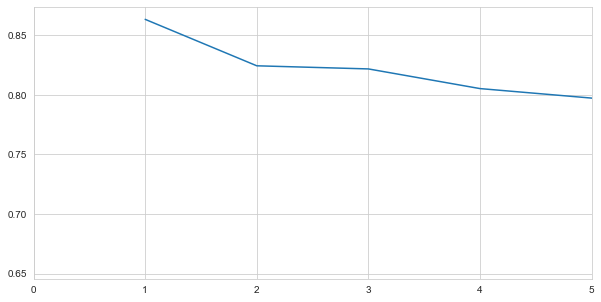

In [435]:
plt.figure(figsize=(10,5))
plt.plot(range(1,50),val_score)
plt.xlim([0,5])
plt.show()

### From this graph we can understand at k=1 our cross validation score is very high

In [436]:
MSE = [1-x for x in val_score]
MSE

[0.1366094828084693,
 0.17558534645757895,
 0.1782057810598754,
 0.19471131695724908,
 0.2026848496040281,
 0.21550909302309684,
 0.22019279733336805,
 0.2291700164332866,
 0.23496861012198433,
 0.23981963177748722,
 0.24400104208052986,
 0.251138765209184,
 0.25442881116394056,
 0.26006089580376057,
 0.2660827347277068,
 0.2727736254143296,
 0.2766211782349419,
 0.2806360484007857,
 0.2820859455295305,
 0.287215549632194,
 0.28927875716352636,
 0.29362860399136737,
 0.29775464599417645,
 0.29992942951065116,
 0.30288480968662346,
 0.30556117217893686,
 0.309074370103978,
 0.3100225949919202,
 0.3129783171394267,
 0.31593332425554355,
 0.3169372905035749,
 0.3190560839533899,
 0.3215097297119168,
 0.32312654003771635,
 0.32507842029047684,
 0.32652772674111696,
 0.3271969028570789,
 0.3294828582105189,
 0.3306540174504965,
 0.3330513622591509,
 0.3348361116966079,
 0.33706626351331614,
 0.33851628499534625,
 0.34007766484426927,
 0.3402452308960713,
 0.340635886741515,
 0.3419744255033

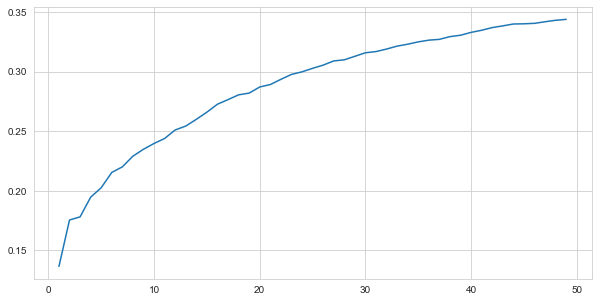

In [437]:
plt.figure(figsize=(10,5))
plt.plot(range(1,50),MSE)
#plt.xlim([0,5])
plt.show()

- From this we can understand that the k values at 1 we finding the least MSE(mean squared error).

In [440]:
k_values_range= range(1,50)

k_optimal = k_values_range[MSE.index(min(MSE))]
k_optimal

1

- From the above we can see the k_optimal is 1.Where we are getting the High Validation_score and minimum Mse(Mean Squred Error).

## Let's Begine with the KNN Algorithm with k_neibours =1

In [441]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_res,y_train_res)
y_pred = knn.predict(X_test)
print('Accuarcy of the KNN model :-',accuracy_score(y_test,y_pred))

Accuarcy of the KNN model :- 0.7592883307169022


In [442]:
print('Accuarcy with test data :-',knn.score(X_test,y_test))
print('Accuarcy with train data :-',knn.score(x_train_res,y_train_res))

Accuarcy with test data :- 0.7592883307169022
Accuarcy with train data :- 1.0


In [475]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[427,   0,   0,   3,   0,   0],
       [  0,  22,   8,   6,   1,   0],
       [  0,  15, 251,  60,  61,  33],
       [  1,   4,  76, 637,  24,   6],
       [  0,   2,  55,  27,  93,  39],
       [  0,   1,   9,   1,  28,  21]], dtype=int64)

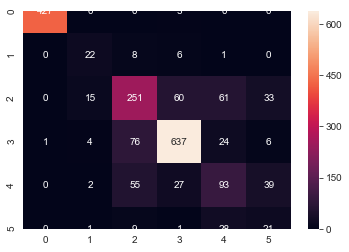

In [484]:
sns.heatmap(mat,annot=True,fmt='d')
plt.show()

- Since the Model is overfitted,we need modify or feature selction use to get the better prediction.

### Let's begine with RandomForestClassifier.

In [485]:
from sklearn.ensemble import RandomForestRegressor

In [486]:
clf = RandomForestClassifier(n_estimators=300,random_state=42)
clf.fit(x_train_res,y_train_res)
Y_pred = clf.predict(X_test)
print('RFC Model accuarcy:-',accuracy_score(y_test,Y_pred))

RFC Model accuarcy:- 1.0


In [487]:
print('Accuarcy with test data :-',clf.score(X_test,y_test))
print('Accuarcy with train data :-',clf.score(x_train_res,y_train_res))

Accuarcy with test data :- 1.0
Accuarcy with train data :- 1.0


In [488]:
imp_features=clf.feature_importances_

In [489]:
imp_features = pd.Series(imp_features,index=X_train.columns)

In [490]:
imp_features.sort_values(ascending=True,inplace=True)

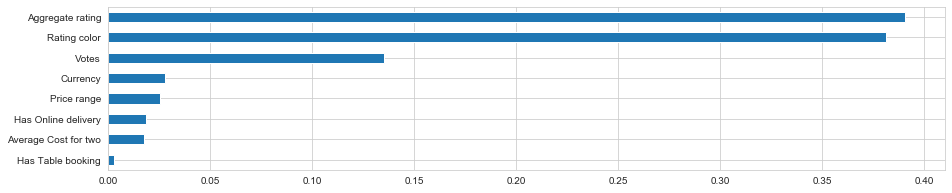

In [491]:
plt.figure(figsize=(15,3))
imp_features.plot(kind='barh')
plt.show()

### Confusion Matrix

In [492]:
mat = confusion_matrix(y_test,Y_pred)
mat

array([[430,   0,   0,   0,   0,   0],
       [  0,  37,   0,   0,   0,   0],
       [  0,   0, 420,   0,   0,   0],
       [  0,   0,   0, 748,   0,   0],
       [  0,   0,   0,   0, 216,   0],
       [  0,   0,   0,   0,   0,  60]], dtype=int64)

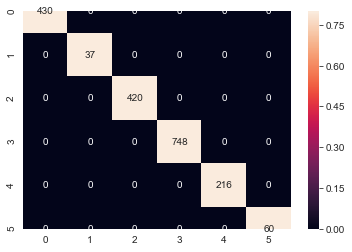

In [493]:
sns.heatmap(mat,annot=True,vmax=0.8,fmt='d')
plt.show()

In [494]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00       420
           3       1.00      1.00      1.00       748
           4       1.00      1.00      1.00       216
           5       1.00      1.00      1.00        60

    accuracy                           1.00      1911
   macro avg       1.00      1.00      1.00      1911
weighted avg       1.00      1.00      1.00      1911



### Thank You.